# Data preparation and manipulation

In [1]:
import PIPS
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
PIPS.__version__

'0.3.0-alpha.6'

The ```photdata``` object in PIPS provides tools to perform basic operation for data manipulation. The implemented operation in the current version includes the following:

- Initialization
- Basic info / note storage
- Basic information check (```print()```, ```len()```, etc.)
- Data identity check (are two ```photdata``` objects identical?)
- Data cut (remove data points with uncertainty above threshold)
- Data cut reset
- Data concatenation

## Initialization

The main function of ```photdata``` is to hold the photometric data. The object requires a list or array or three elements, ```x```, ```y```, and ```yerr``` each containing the same length of the time, magnitude (or flux), and magnitude-uncertainty data.

For convenience, datafile generated by [LOSSPhotPipeline]('https://github.com/benstahl92/LOSSPhotPipeline') can be directly imported using a helper function ```data_readin_LPP```.

In [3]:
data = PIPS.data_readin_LPP('../sample_data/005.dat',filter='V')
x,y,yerr = data
print('data shape:\t',np.array(data).shape)
print('x shape:\t',x.shape)
print('y shape:\t',y.shape)
print('y-error shape:\t',yerr.shape)

data shape:	 (3, 103)
x shape:	 (103,)
y shape:	 (103,)
y-error shape:	 (103,)


The most basic method to initialize data is to give ```data=[x,y,yerr]``` as an argument for ```PIPS.photdata()```.
The initialization function also accepts ```label``` and ```band``` arguments, each of which should be used to store information.

In [4]:
star  = PIPS.photdata(data) # the most basic way to initialize object
star2 = PIPS.photdata(data,label='Star2',band='V') # same as star1, but with more info

## copying photdata object


## Printing information
```photdata``` accepts some basic python operations, such as ```str()```, ```print()```, ```len()```, and ```hash()```. These can be used to check certain properties of the object.

In [5]:
# basic information check
print('* Basic information check')
print(star)              # the basic information
print(star2)             # the basic information -- label and filter info is included
print('len():',len(star))         # number of datapoints
print('hash():',hash(star))

* Basic information check
Photdata : band=None, size=103, period=None
Photdata Star2: band=V, size=103, period=None
len(): 103
hash(): 3349517558981431842


## Creating an identical copy
```photdata``` object has methods ```__copy__()``` and ```copy()```. These methods by default performs a [deepcopy](https://docs.python.org/3/library/copy.html) instead of shallow copy (binding) to the original object to avoid possible error. 

In [15]:
star3 = star2.copy()    # creates a copy of star3 (including all attributes)

## Checking if two objects are identical

In [16]:
print('when two objects have the same data, they are considered identical')
print('star == star2:',star == star2)     # two objects are identical (hash-equality)
print('star == star3:',star == star3)     # two objects are identical (hash-equality)

print('\nIf any of the data points are changed, they are not identical anymore')
star3.x[-1] = 0         # manually change the data (don't do this!)
print('star == star3:', star == star3)    # False because data itself is changed

when two objects have the same data, they are considered identical
star == star2: True
star == star3: True

If any of the data points are changed, they are not identical anymore
star == star3: False


Note that, since ```copy()``` performs deep copy, ```star2``` is unchanged even after ```star3``` has been changed.

In [17]:
star2.x[-1] # star2 has not been changed

58805.179271

## Applying cuts

The ```cut()``` function in ```photdata``` object offers a quick and easy way to apply data cuts. It takes in ```xmin, xmax, ymin, ymax, yerr_min, yerr_max``` arguments, and any combination of these can be applied simultaneously. Once cuts are applied, the existing cuts are effective even when a user applies another cut on different parameter later.

In [18]:
period,_ = star.get_period(multiprocessing=False)

Before cuts: Photdata Star2: band=V, size=103, period=None


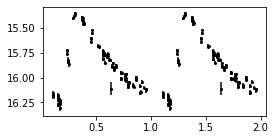

After a cut: Photdata Star2: band=V, size=89, period=None


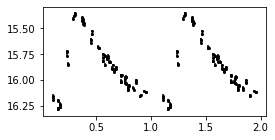

After cut reset: Photdata Star2: band=V, size=103, period=None


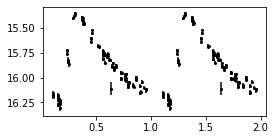

After another cut: Photdata Star2: band=V, size=14, period=None


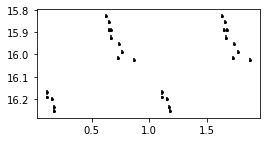

* Even after cuts are applided, two originally identical objects are still identical.
star == star2: True


In [19]:
star2.reset_cuts()
print('Before cuts:', star2)           # info before cuts are applied
star2.plot_lc(period,figsize=(4,2)); plt.show()
star2.cut(yerr_max=0.02)               # cuts data (based on x, y, and yerr values)
print('After a cut:', star2)           # now data is shorter
star2.plot_lc(period,figsize=(4,2)); plt.show()
star2.reset_cuts()
print('After cut reset:', star2)       # reset the cut settings
star2.plot_lc(period,figsize=(4,2)); plt.show()

star2.cut(ymin = 15.8)                 # a cut
star2.cut(yerr_max = 0.01, xmin=58676) # additional cuts
print('After another cut:', star2)     # now both yerr_min and ymin are applied
star2.plot_lc(period,figsize=(4,2)); plt.show()
print('* Even after cuts are applided, two originally identical objects are still identical.')
print('star == star2:', star == star2) # raw data is internally preserved 

## Combining / concatenating two objects
It is sometimes necessary to merge two sets of data reduced/prepared separately. PIPS offers a quick way to merge two datasets using ```+``` (add) operator.

In [22]:
print(star)
print(star2)
star4 = star + star2     # data concatenation (returns another photdata object)
star4.label = 'Combined' # always add labels
print(star4)             # star4 has more datapoints (notice cuts are applied to star2)
print('star == star4:', star == star4)  # once the data itself is changed, they are not identical

Photdata : band=None, size=103, period=0.6968874975991536
Photdata Star2: band=V, size=14, period=None
Photdata Combined: band=None, size=117, period=None
star == star4: False
